# 探索数据集-泰坦尼克

# 1.简介（Introduction）

## 1.1.数据集

### 1.1.1.数据字段含义

Variable | Definition | Key
---------| -----------|------
PassengerId | Passenger id(旅客编号) |
survival | Survival(旅客) | 0 = No, 1 = Yes
pclass | Ticket class(船票类型) | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex(性别) |	
Age | Age(年龄) | in years	
sibsp | of siblings / spouses aboard the Titanic(一同上船的兄弟姐妹或配偶) |	
parch | of parents / children aboard the Titanic(一同上船的父母或孩子) |	
ticket | Ticket number(票号) |	
fare | Passenger fare(票价) |	
cabin | Cabin number(船舱) |	
embarked | Port of Embarkation(出发港) | C = Cherbourg, Q = Queenstown, S = Southampton
 


### 1.1.2.变量使用注意事项
**pclass(船票类型): **

A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age(年龄):  **

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp(一同上船的兄弟姐妹或配偶): **

The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch(一同上船的父母或孩子): **

The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 1.2.研究问题

### 1.2.1.有哪些因素会让船上的人生还率更高？


**1.年龄、票价与生还率的关系**

年龄和票价为数值变量归为一类进行探索


**2.性别、船票等级与生还率的关系**

性别和船票等级为类别变量归为一类进行探索

## 2.数据整理（Data Wrangling）

## 2.1.数据采集

### 2.1.1.通用函数

In [1]:
'''
汇总常用的数据处理函数
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline


def load_data_csv (filename):
    '''
    加载数据文件
    必须是 csv 文件
    '''
    titanic_df = pd.read_csv(filename)
    return titanic_df


def correlation(x, y):
    '''
    皮尔逊相关系数
    correlation = average of (x in standard units) times(y in standard units)
    std(ddof=0)
    pearson`s r(-1, 1)
    '''
    x_std = (x - x.mean())/x.std(ddof=0)
    y_std = (y - y.mean())/y.std(ddof=0)
    return (x_std * y_std).mean()


### 2.1.2.导入数据

In [12]:
titanic_df = load_data_csv('titanic-data.csv')
#前5行
# titanic_df.head()

### 2.1.3.查看数据常规属性

In [16]:
#末尾5行
titanic_df.tail()
#索引
titanic_df.index
#列
titanic_df.columns
#第一行
# titanic_df.iloc[0]
# titanic_df.loc[0]
#指定列
# titanic_df.loc[:, 'Age']
# titanic_df.loc[:, 'Age': "Fare"]
# titanic_df.iloc[:, 0:2]
#底层数据
titanic_df.values
#统计汇总
titanic_df.describe()
#数据转置
# titanic_df.T


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#按轴进行排序
titanic_df.sort_index(axis=0, ascending=False)
#按值进排序
sv = titanic_df.sort_values(by='Age', axis=0, ascending=True)
sv = titanic_df.sort_values(by=['Age','Fare'], axis=0, ascending=[True,True],na_position='last')
# sv.head()

## 2.2.清理数据

### 2.2.1.异常数据项

**1.Age：**年龄信息有小数和空值需要排除
*需要填充异常空值数据*

**2.Fare：**票价有0的情况
*需要填充异常数据*

**3.Cabin：**船舱号有空的情况
*不做参考因素，不处理*

**4.Embarked：**出发港有空的情况
*不做参考因素，不处理*

**5.Pclass：**船票类型与票价的对应中有高类型对应低票价情况，
*需要排除特别数据*

### 2.2.2.修正数据类型

**1.Age：**填充  异常缺失值

In [17]:
titanic_df.Age.fillna(titanic_df.Age.mean(), inplace=True)

**2.Fare：**票价0的数据需要填充

In [18]:
faremean = titanic_df.Fare.mean()
print faremean
def fix_fare(num):
    if (num <= 0.0000):
        num = faremean
    return num
#print titanic_df.Fare.mean()
titanic_df.Fare = titanic_df.Fare.apply(fix_fare)
# titanic_df.sort_values(by='Fare', axis=0, ascending=True)


32.2042079686


## 3.探索性数据分析（EDA, Exploratory Data Analysis）

In [19]:
#生还数据
Survived = titanic_df['Survived']
# print Survived

### 3.1.探索年龄、票价与生还率的关系

#### 3.1.1.探索

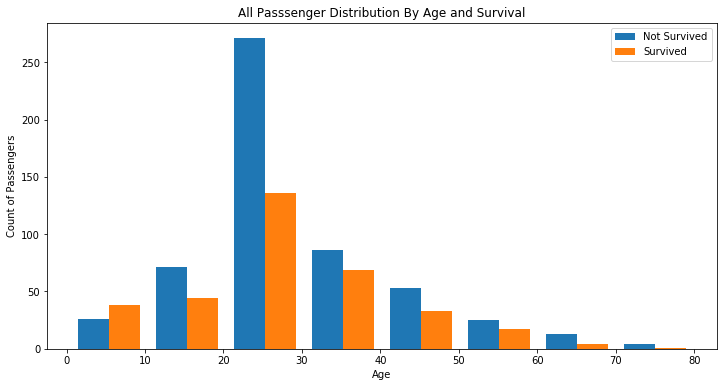

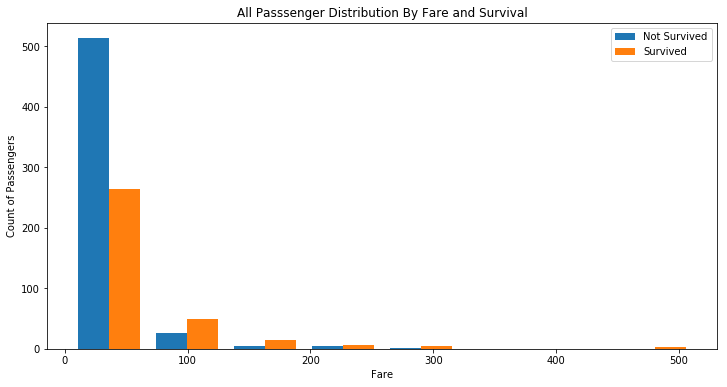

In [20]:
def histRate(feature, not_survived, survived):
    '''
    绘制直方图
    feature:探索的字段
    not_survived：非幸存者
    survived:幸存者
    '''
    
    plt.figure(figsize=(12,6))
    plt.hist([not_survived, survived], stacked=False, bins=8)
    plt.title('All Passsenger Distribution By '+feature+' and Survival')
    plt.xlabel(feature)
    plt.ylabel('Count of Passengers')
    plt.legend(['Not Survived', 'Survived'])
    plt.show()

#年龄对应幸存者数据和非幸存者数据
age_not_survived = titanic_df[titanic_df.Survived == 0].Age
age_survived = titanic_df[titanic_df.Survived == 1].Age
histRate('Age', age_not_survived, age_survived)


#票价对应幸存者数据和非幸存者数据
fare_not_survived = titanic_df[titanic_df.Survived == 0].Fare
fare_survived = titanic_df[titanic_df.Survived == 1].Fare
histRate('Fare', fare_not_survived, fare_survived)

#### 3.1.2.分析

**1.年龄**

0-10岁：幸存者比例高

20-40岁：根据图形来看，这个年龄段的乘客最多

20-30岁：幸存者和非幸存者的比例相差最大

其他年龄段的非幸存者比例高

从年龄与幸存者比例看不出年龄与生还率的关联关系

**2.票价**

根据图形来看，票价在100左右的人幸存者要多于非幸存者
票价低于100的人幸存者比例少于非幸存者


### 3.2.性别、船票等级与生还率的关系

#### 3.2.1.探索

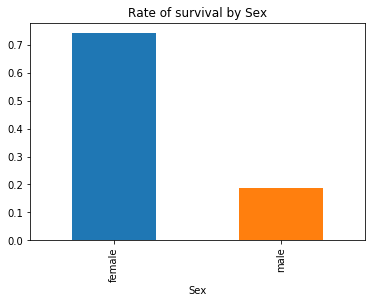

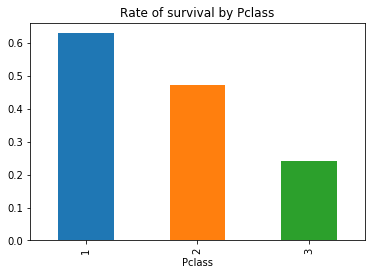

In [21]:
def plotRate(feature):
    '''
    计算生存率和显示柱状图
    '''
    survived_by_feature = titanic_df.groupby(feature).mean()['Survived']
    survived_by_feature.plot(kind='bar')
    plt.title('Rate of survival by '+feature)
    plt.show()

#性别相关生存率柱状图
plotRate('Sex')

#船票等级相关生存率柱状图
plotRate('Pclass')

#### 3.2.2.分析

**1.性别**

根据根据女性的生还率:70%左右 男性生还率:20%左右，根据直方图来看，女性生还率可能比男性高。

**2.船票等级**

按照柱状图所示，按照船票等级，生还率依次降低，船票等级高的生还率要高


### 3.3.船票等级与船票价格的关系

#### 3.3.1.探索

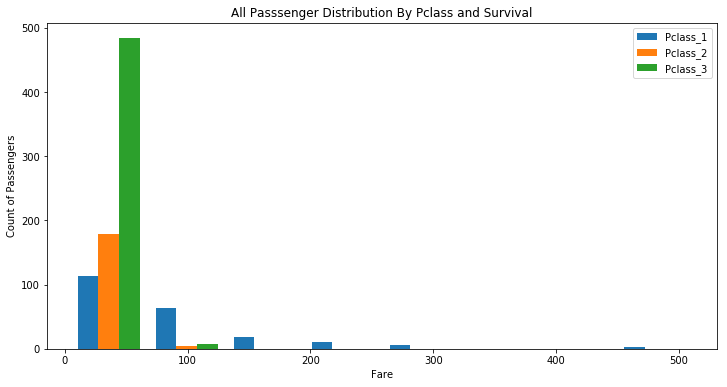

In [22]:
Fare_1 = titanic_df[titanic_df.Pclass == 1].Fare
Fare_2 = titanic_df[titanic_df.Pclass == 2].Fare
Fare_3 = titanic_df[titanic_df.Pclass == 3].Fare

plt.figure(figsize=(12,6))
plt.hist([Fare_1, Fare_2, Fare_3], stacked=False, bins=8)
plt.title('All Passsenger Distribution By Pclass and Survival')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.legend(['Pclass_1', 'Pclass_2', 'Pclass_3'])
plt.show()

#### 3.2.2.分析

**船票等级与船票价格**

船票等级与船票价格的相关性不是很大，各个船票等级在主要的价格区间都有分布，只是较高价位只存在1等票



## 4.结论（Conclusion）

### 4.1.总结

说明：由于本次数据分析使用的数为总体数据的一部分，并且数据量较小，使用探索性分析，所以只能得出对于变量之间的相关关系，而不能得出因果关系

根据前面的分析总结如下：

**1、和生还率有相关关系的因素有性别、船票等级**

*关于性别*

相关因素，遇到危难的时候，让女性首先获取生还的机会，优先妇女儿童，这个是社会普遍的价值观，这个可能是造成女性生还率高的原因。

*关于船票等级*

和生还率有一定相关性，根据探索，船票等级和船票价格的对应关系也不是很高，不知道是以什么作为划分等级

**2、年龄、船票价格与生还率相关关系不大**

这里面 0-10岁的人比较特殊，生还率比较高，推测也是妇女儿童优先的社会普遍价值观的因素。

**3、考虑其他可能影响生还率的因素**

关于生还率，还需要考虑的，可能还有每个人的身体健康状况、是否了解自救常识、是否会游泳等也可能会影响到生还率



### 4.2.预测

因为数据量有限，并且分析比较浅显，暂不能做出有效预测

## 5.研究结果交流

通过与朋友探讨，交流研究结果